In [ ]:
# 🎮 Video Game Sales Analysis

This project explores and analyzes video game sales data, focusing on global trends by platform, genre, and publisher. We also build regression models to predict global sales using various features.

Dataset Source: [Kaggle - Video Game Sales](https://www.kaggle.com/datasets/gregorut/videogamesales)


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
## 📥 Data Loading and Initial Overview

We load the video game sales dataset and examine its basic structure, data types, and missing values.


In [35]:
df = pd.read_csv('../data/vgsales.csv')
df_cleaned = df.dropna(subset=['Global_Sales'])
df_cleaned['Publisher'] = df_cleaned['Publisher'].fillna(df_cleaned['Publisher'].mode()[0])
df_cleaned['Year'] = df_cleaned['Year'].fillna(df_cleaned['Year'].median())

In [ ]:
## 📊 Exploratory Data Analysis

We explore trends in global sales by genre, year, platform, and publisher using various visualizations.


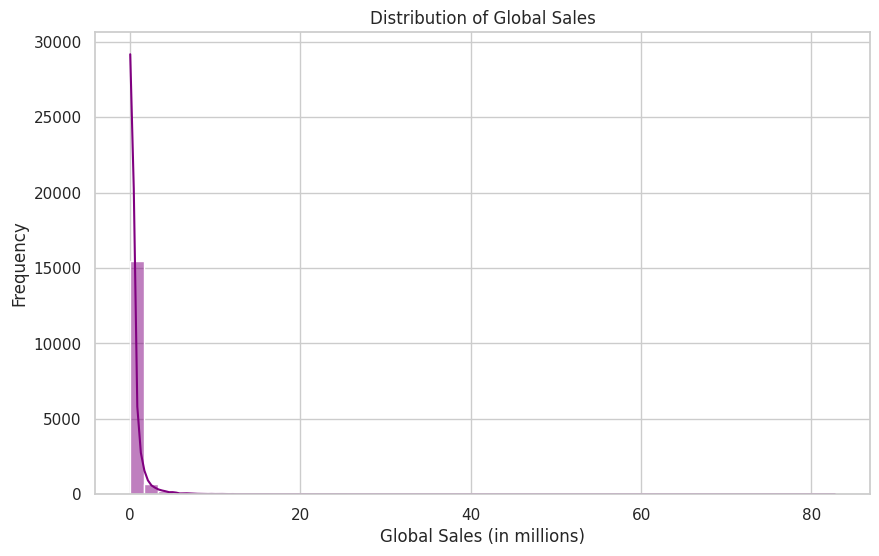

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Global_Sales'], kde=True, bins=50, color='purple')
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

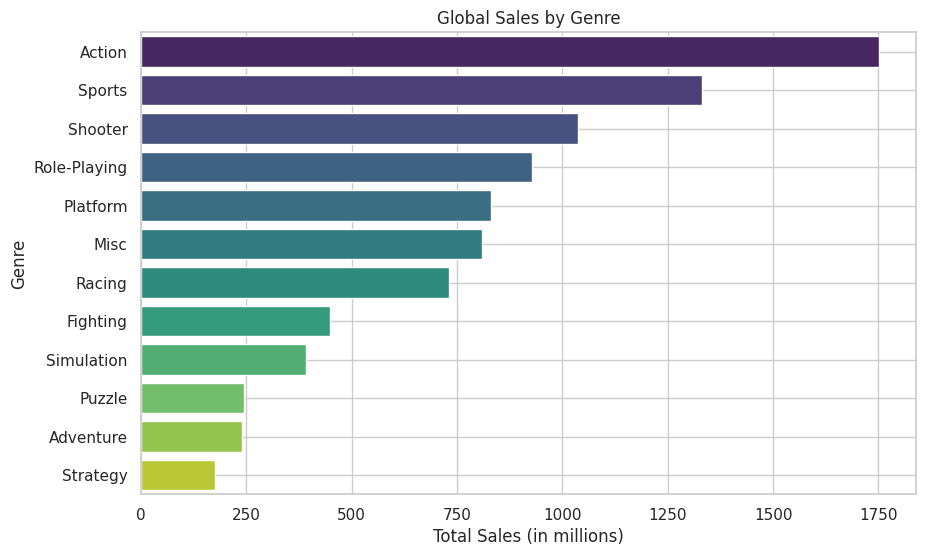

In [37]:
genre_sales = df_cleaned.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_sales.values, y=genre_sales.index, palette='viridis', hue=genre_sales.index, dodge=False, legend=False)
plt.title('Global Sales by Genre')
plt.xlabel('Total Sales (in millions)')
plt.ylabel('Genre')
plt.grid(True)
plt.show()

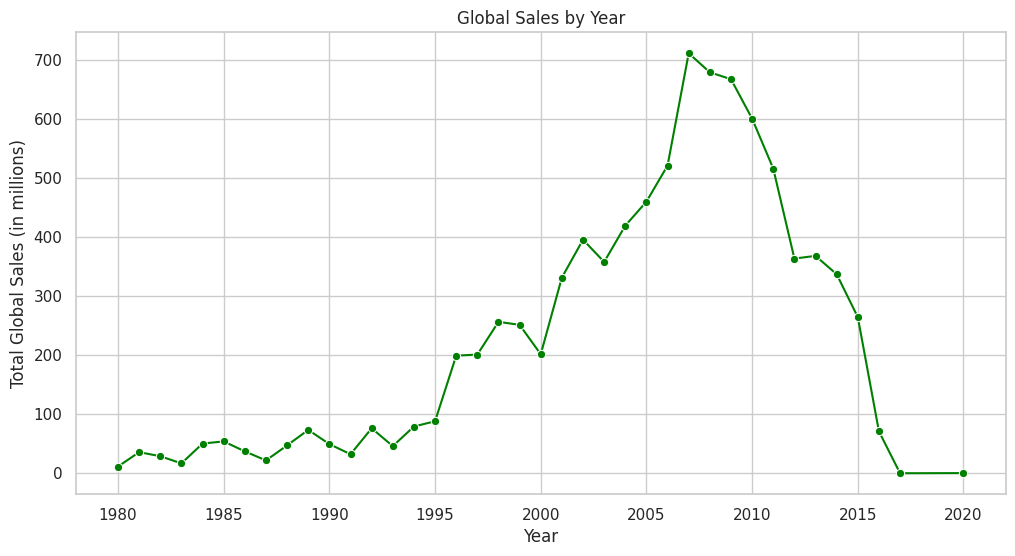

In [38]:
yearly_sales = df_cleaned.groupby('Year')['Global_Sales'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, marker='o', color='green')
plt.title('Global Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (in millions)')
plt.grid(True)
plt.show()

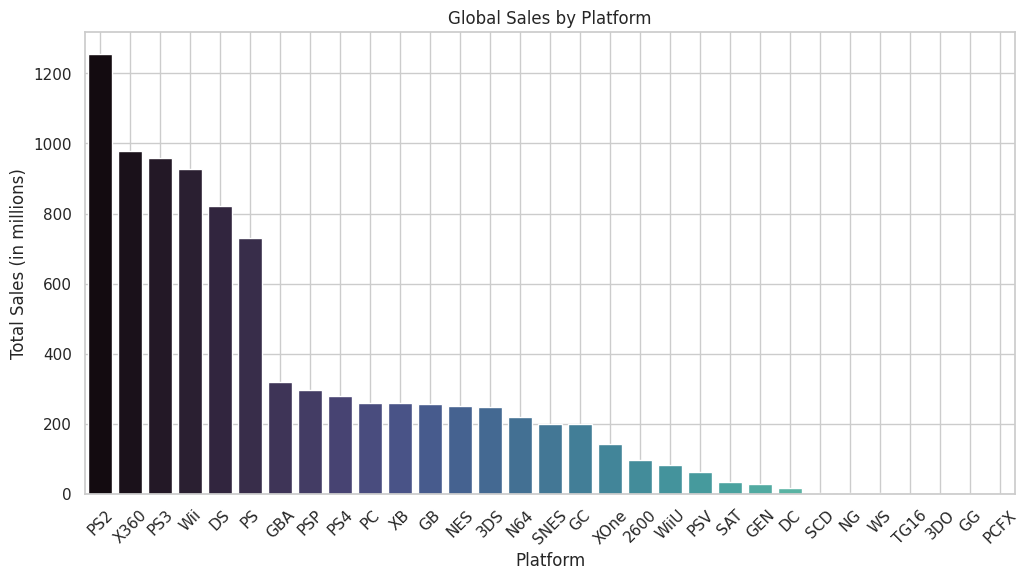

In [39]:
platform_sales = df_cleaned.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=platform_sales.index, y=platform_sales.values, palette='mako', hue=platform_sales.index, dodge=False, legend=False)
plt.title('Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

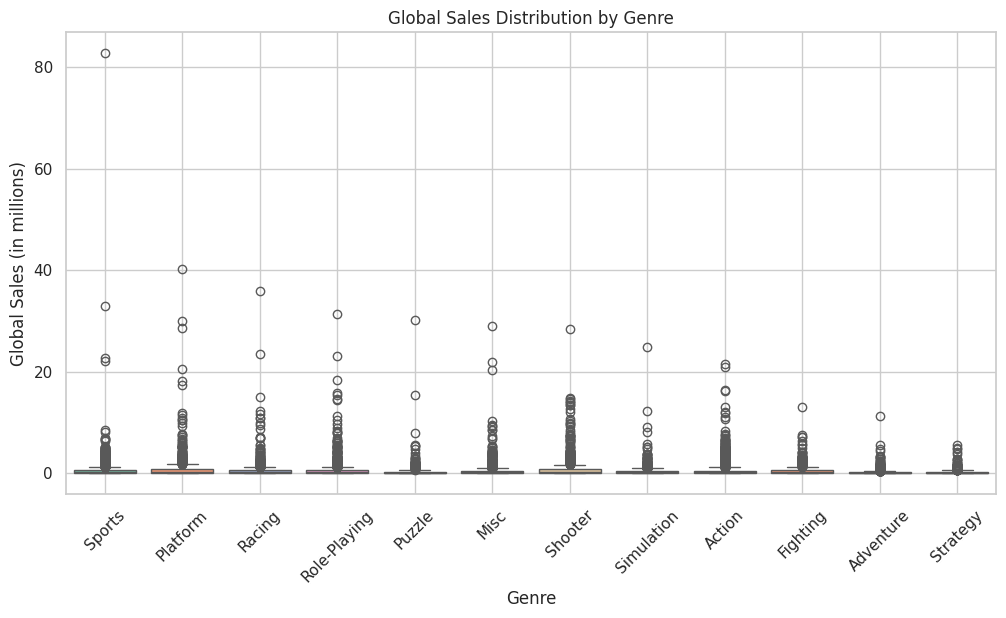

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Global_Sales', data=df_cleaned, palette='Set2', hue='Genre', dodge=False, legend=False)
plt.title('Global Sales Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

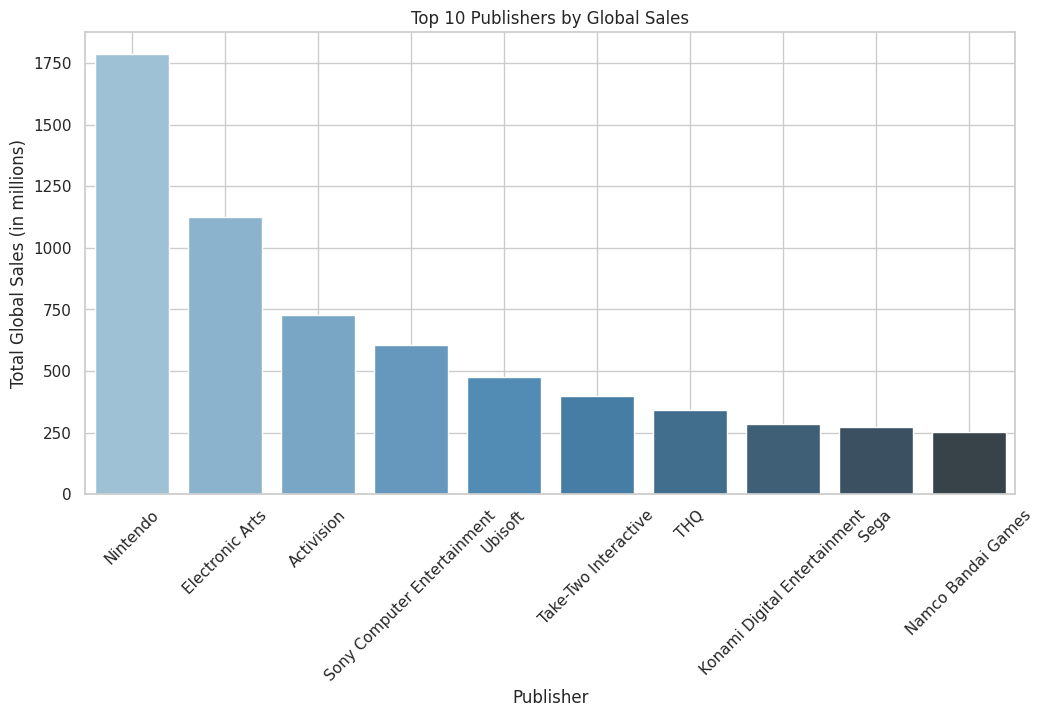

In [41]:
top_publishers = df_cleaned.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.index, y=top_publishers.values, palette='Blues_d', hue=top_publishers.index, dodge=False, legend=False)
plt.title('Top 10 Publishers by Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Total Global Sales (in millions)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
## ⚙️ Feature Engineering

We prepare the dataset by encoding categorical variables and selecting useful features for regression modeling.


In [42]:
sales_features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
features = ['Platform', 'Genre', 'Publisher', 'Year'] + sales_features
df_encoded = pd.get_dummies(df_cleaned[features])
X = df_encoded
y = df_cleaned['Global_Sales']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
## 🤖 Regression Modeling

We use multiple regression techniques (Linear, Ridge, and Lasso) to predict global sales and evaluate them using metrics like MSE and R-squared.


In [44]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression MSE:", round(mean_squared_error(y_test, y_pred_lr), 2))
print("Linear Regression R-squared:", round(r2_score(y_test, y_pred_lr), 2))

Linear Regression MSE: 0.0
Linear Regression R-squared: 1.0


In [45]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge Regression MSE:", round(mean_squared_error(y_test, y_pred_ridge), 2))
print("Ridge Regression R-squared:", round(r2_score(y_test, y_pred_ridge), 2))

Ridge Regression MSE: 0.0
Ridge Regression R-squared: 1.0


In [46]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso Regression MSE:", round(mean_squared_error(y_test, y_pred_lasso), 2))
print("Lasso Regression R-squared:", round(r2_score(y_test, y_pred_lasso), 2))

Lasso Regression MSE: 0.17
Lasso Regression R-squared: 0.96


In [47]:
cv_scores = cross_val_score(lasso, X, y, scoring='neg_mean_squared_error', cv=5)
print("Mean Cross-Validation MSE:", round(-cv_scores.mean(), 2))
print("Standard Deviation of MSE:", round(cv_scores.std(), 2))

Mean Cross-Validation MSE: 2.54
Standard Deviation of MSE: 5.06


In [ ]:
## ✅ Final Model Selection

Based on performance and simplicity, we select Linear Regression as the final model. It gives a good baseline for prediction using non-sales features.


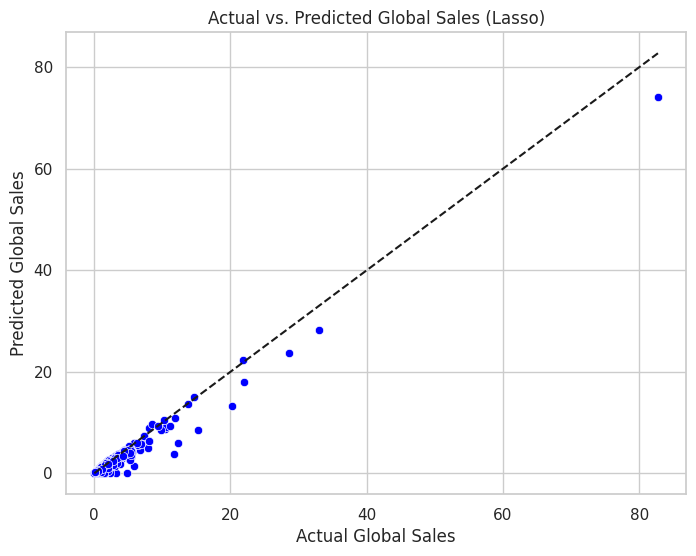

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lasso, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Global Sales')
plt.ylabel('Predicted Global Sales')
plt.title('Actual vs. Predicted Global Sales (Lasso)')
plt.grid(True)
plt.show()